In [36]:
# Import the modules
import qrsintervals
from chazal_datasets import CHAZAL_TEST_DATASET, CHAZAL_TRAIN_DATASET

# Define the extraction parameters
mitdbih_db_path = r'C:\Users\hi\Desktop\arrhythmia-beat-classification-master\dataset\mit-bih-arrhythmia-database-1.0.0'
mat_file = 'ecg_signals.mat'
annotations = 'A', 'V', 'N', 'L', 'R'
records_to_extract = CHAZAL_TEST_DATASET + CHAZAL_TRAIN_DATASET
start_sample_index = 0
end_sample_index = 650_000
qrs_interval_length = 320
ecg_lead = 'MLII'

# Extract the signals and save them to a .mat file
qrsintervals.extract_qrs_intervals_and_save(
    mitdbih_db_path,                       # MIT-BIH Arrhythmia Database path
    mat_file,                              # Resultig .mat file path
    annotations,                           # Annotations
    lead=ecg_lead,                         # ECG lead
    sampfrom=start_sample_index,           # Start sample index
    sampto=end_sample_index,               # End sample index
    dataset=records_to_extract,            # Records to extract
    interval_length=qrs_interval_length    # QRS Interval length
)

Extracting QRS intervals for labels A, V, N, L, R
Extracting QRS intervals from record 100
 - Label A, 33 item(s)
 - Label V, 1 item(s)
Could not cut RR interval from QRS index 76
Could not cut RR interval from QRS index 649992
 - Label N, 2237 item(s)
 - Label L, 0 item(s)
 - Label R, 0 item(s)
Extracting QRS intervals from record 103
 - Label A, 2 item(s)
 - Label V, 0 item(s)
Could not cut RR interval from QRS index 649875
 - Label N, 2081 item(s)
 - Label L, 0 item(s)
 - Label R, 0 item(s)
Extracting QRS intervals from record 105
 - Label A, 0 item(s)
 - Label V, 41 item(s)
 - Label N, 2526 item(s)
 - Label L, 0 item(s)
 - Label R, 0 item(s)
Extracting QRS intervals from record 111
 - Label A, 0 item(s)
 - Label V, 1 item(s)
 - Label N, 0 item(s)
 - Label L, 2123 item(s)
 - Label R, 0 item(s)
Extracting QRS intervals from record 113
 - Label A, 0 item(s)
 - Label V, 0 item(s)
Could not cut RR interval from QRS index 649994
 - Label N, 1788 item(s)
 - Label L, 0 item(s)
 - Label R, 

In [38]:
# Import the required libraries
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
# Load the ecg_signals.mat file
ECG_signals = sio.loadmat('ecg_signals.mat')
N_signals = ECG_signals['N']
A_signals = ECG_signals['A']
V_signals = ECG_signals['V']
L_signals = ECG_signals['L']
R_signals = ECG_signals['R']

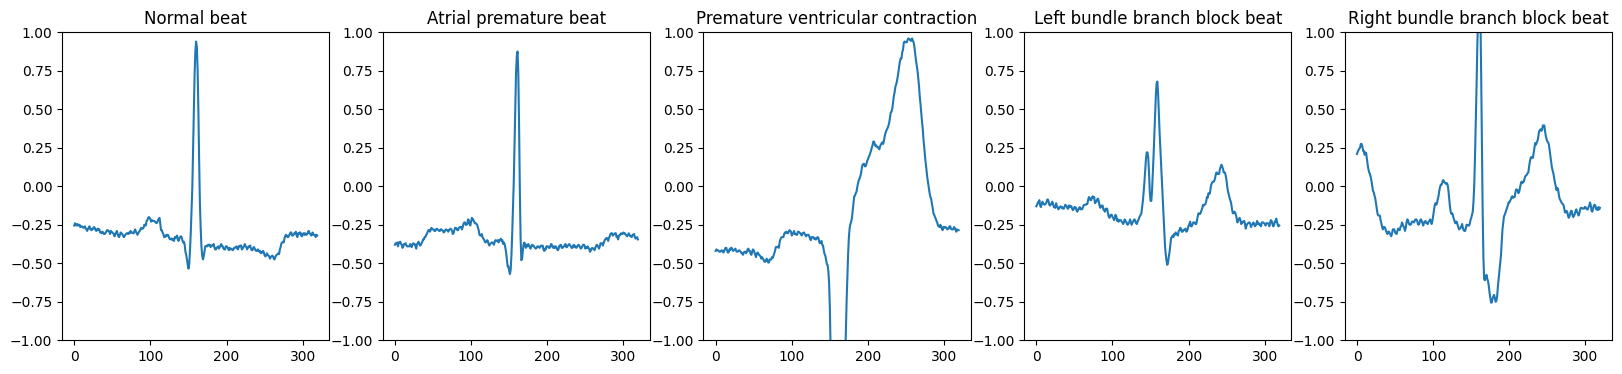

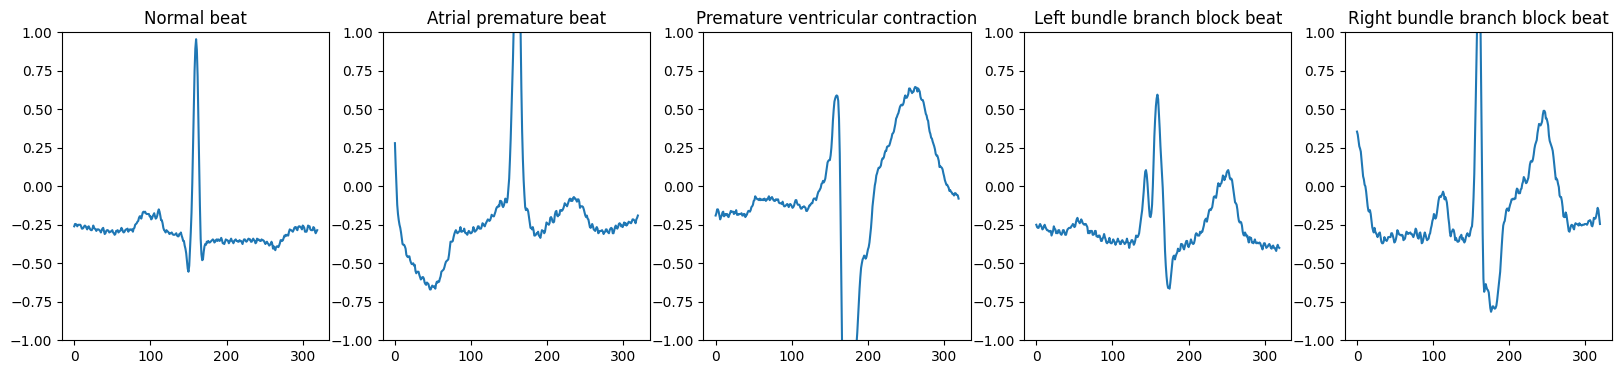

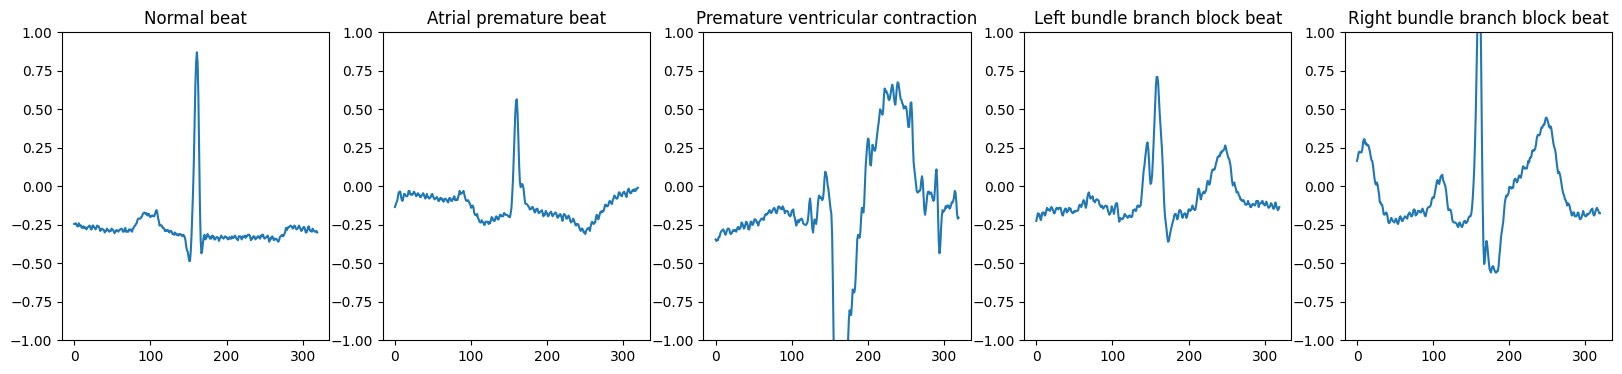

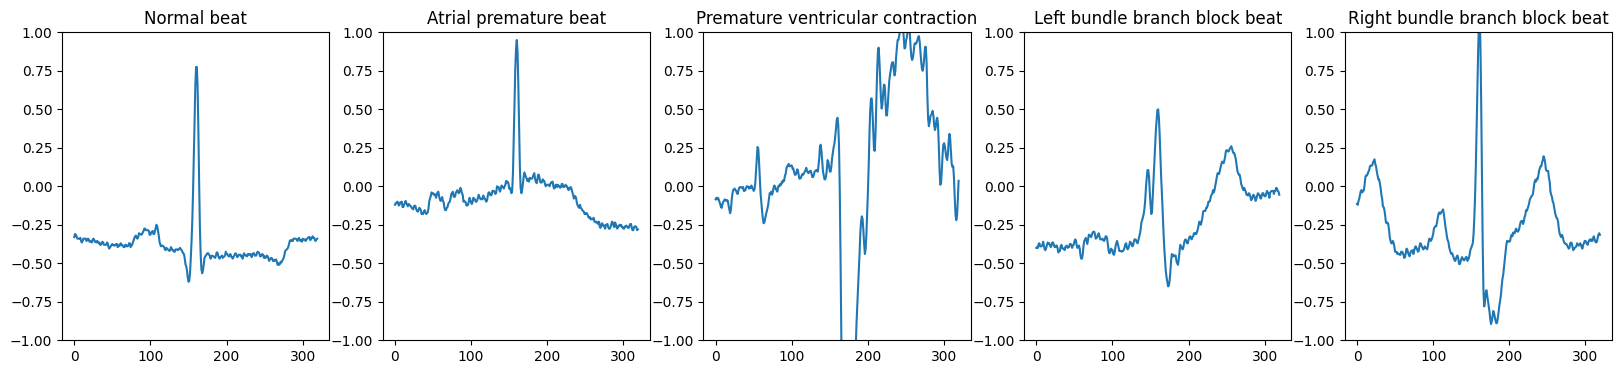

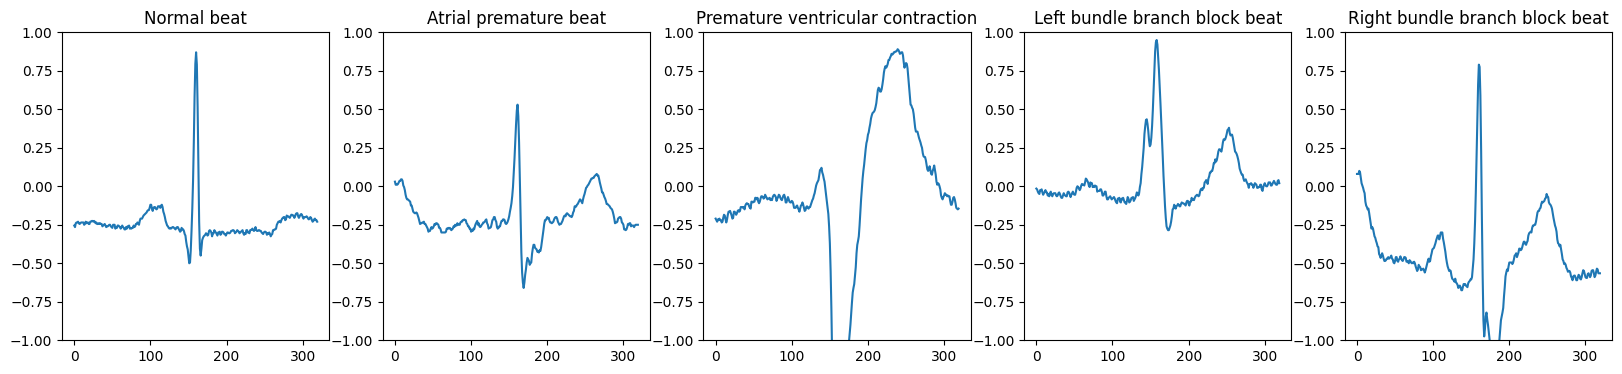

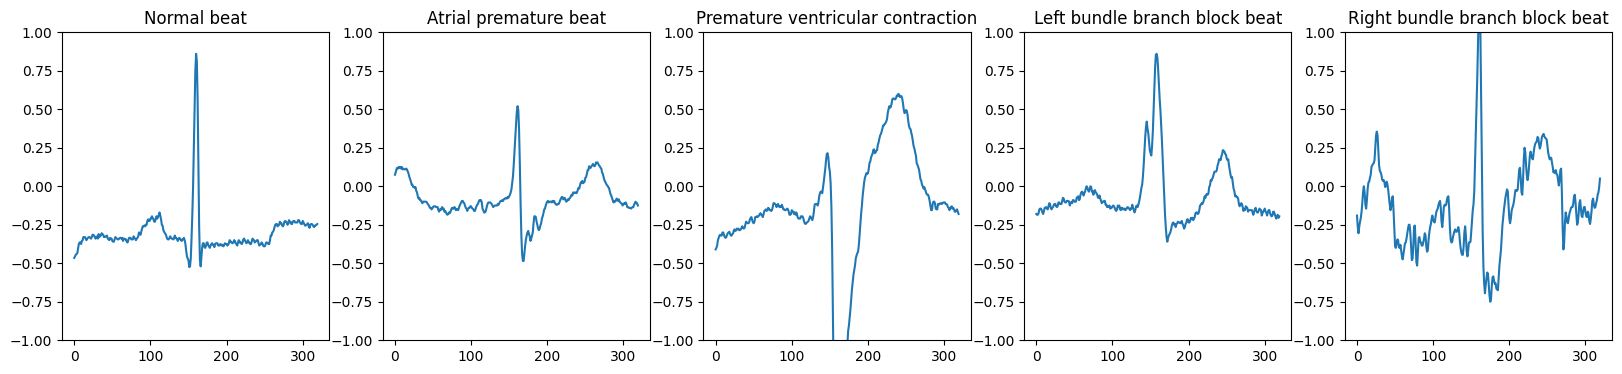

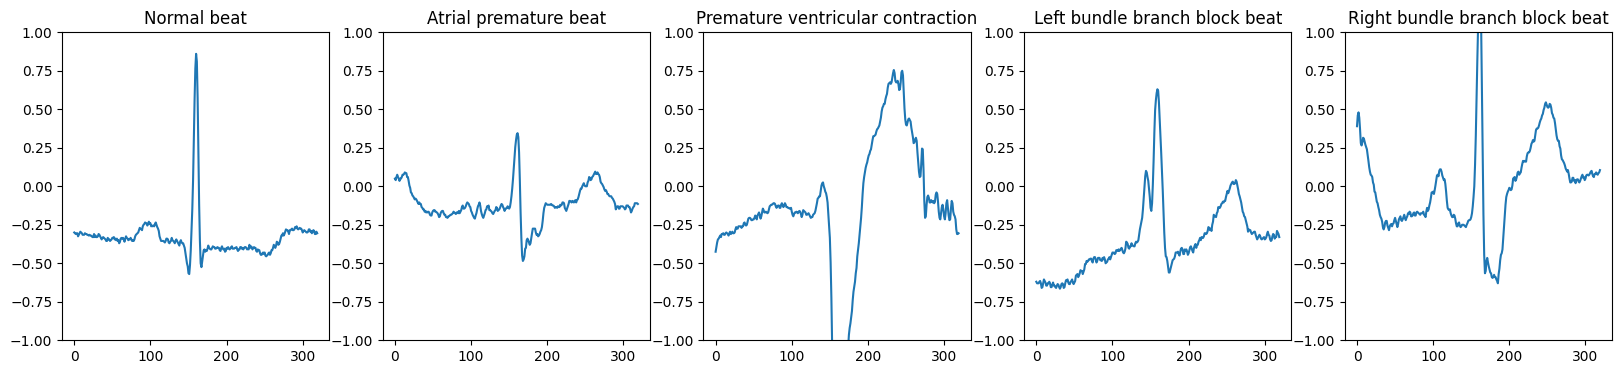

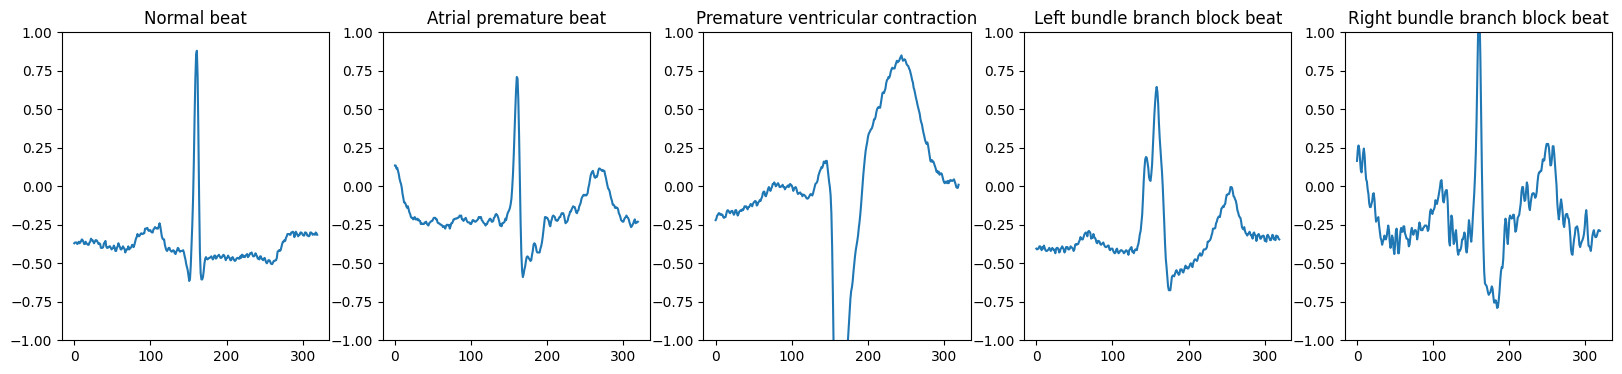

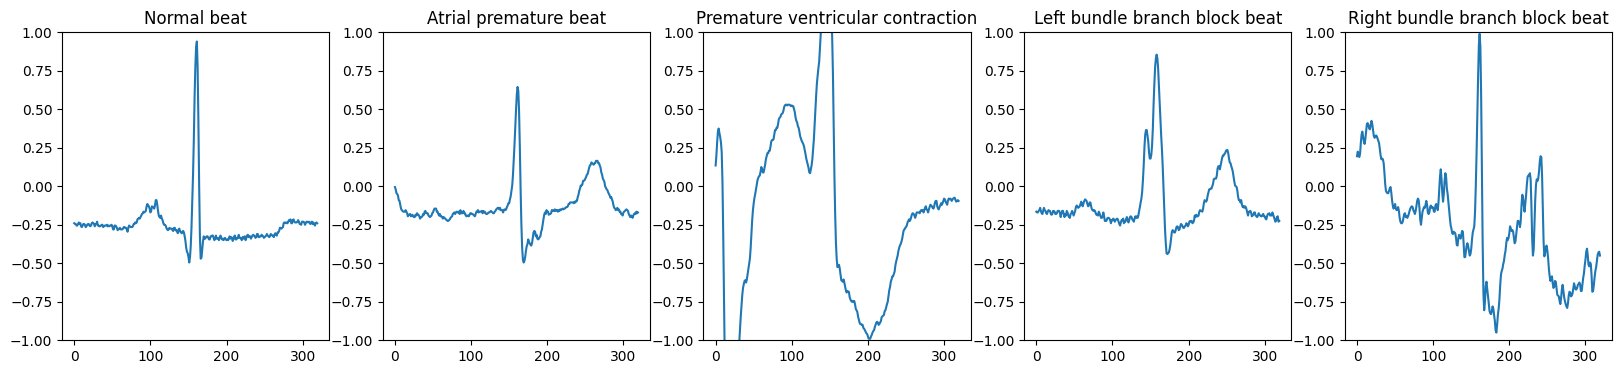

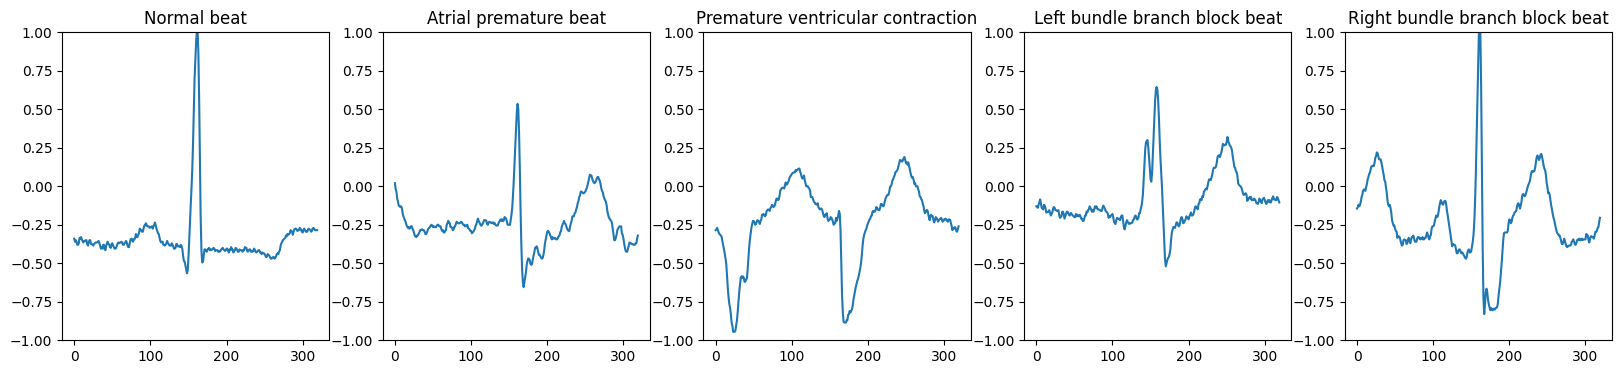

In [40]:
# Plot the signals
x = range(0, 320)
for i in range(0, 1000, 100):
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))    
    ax1.set_title('Normal beat')
    ax1.plot(x, N_signals[i, :])
    ax1.set_ylim([-1, 1])
    ax2.set_title('Atrial premature beat')
    ax2.plot(x, A_signals[i, :])
    ax2.set_ylim([-1, 1])    
    ax3.set_title('Premature ventricular contraction')
    ax3.plot(x, V_signals[i, :])
    ax3.set_ylim([-1, 1])    
    ax4.set_title('Left bundle branch block beat')
    ax4.plot(x, L_signals[i, :])
    ax4.set_ylim([-1, 1])
    ax5.set_title('Right bundle branch block beat')
    ax5.plot(x, R_signals[i, :])
    ax5.set_ylim([-1, 1])    
    plt.show()

In [48]:
# Import the required libraries
import pandas as pd
import pywt
import preprocessing

In [49]:
# Load the ecg_signals.mat file
ECG_signals = sio.loadmat('ecg_signals.mat')

In [50]:
# Define the feature extraction parameters
classes = 'A', 'V', 'N', 'L', 'R'
signals_per_class = 2546
wavelet = pywt.Wavelet('bior6.8')
# By the next way, you can calculate the maximum decomposition level
# but this time we will use 8 instead.
#decomposition_level = pywt.dwt_max_level(
#    data_len=320,  # Each signal has 320 samples
#    filter_len=wavelet_bior6.8.dec_len
#)
decomposition_level = 8

In [ ]:
# Extract features
ext_feat_signals = preprocessing.extract_features(
    ECG_signals,         # The ECG signals from the ecg_signals.mat
    classes,             # The classification classes (A, V, N, L, R)
    signals_per_class,   # How many signals per class we have
    wavelet,         # The Wavelet
    decomposition_level  # The decomposition level for the Wavelet decomposition
)

Error processing special ratio case: Path length is out of range.
Error processing special ratio case: Path length is out of range.
Error processing special ratio case: Path length is out of range.
Error processing special ratio case: Path length is out of range.
Error processing special ratio case: Path length is out of range.
Error processing special ratio case: Path length is out of range.
Error processing special ratio case: Path length is out of range.
Error processing special ratio case: Path length is out of range.
Error processing special ratio case: Path length is out of range.
Error processing special ratio case: Path length is out of range.
Error processing special ratio case: Path length is out of range.
Error processing special ratio case: Path length is out of range.
Error processing special ratio case: Path length is out of range.
Error processing special ratio case: Path length is out of range.
Error processing special ratio case: Path length is out of range.
Error proc

In [19]:
# Import the required libraries
import pandas as pd
import pywt
import preprocessing

In [20]:
ext_feat_signals

NameError: name 'ext_feat_signals' is not defined

In [12]:
# save the DataFrame, in order to use it later
ext_feat_signals.to_csv('ecg_signals.preprocessed.csv', index=False)

In [13]:
for col in ext_feat_signals.columns:    
    print(f'- {col}')

- mean_a
- mean_aa
- mean_aaa
- mean_aaaa
- mean_aaaaa
- mean_aaaaaa
- mean_aaaaaaa
- mean_aaaaaaaa
- mean_d
- mean_dd
- mean_ddd
- mean_dddd
- mean_ddddd
- mean_dddddd
- mean_ddddddd
- mean_dddddddd
- std_dev_a
- std_dev_aa
- std_dev_aaa
- std_dev_aaaa
- std_dev_aaaaa
- std_dev_aaaaaa
- std_dev_aaaaaaa
- std_dev_aaaaaaaa
- std_dev_d
- std_dev_dd
- std_dev_ddd
- std_dev_dddd
- std_dev_ddddd
- std_dev_dddddd
- std_dev_ddddddd
- std_dev_dddddddd
- median_a
- median_aa
- median_aaa
- median_aaaa
- median_aaaaa
- median_aaaaaa
- median_aaaaaaa
- median_aaaaaaaa
- median_d
- median_dd
- median_ddd
- median_dddd
- median_ddddd
- median_dddddd
- median_ddddddd
- median_dddddddd
- skewness_a
- skewness_aa
- skewness_aaa
- skewness_aaaa
- skewness_aaaaa
- skewness_aaaaaa
- skewness_aaaaaaa
- skewness_aaaaaaaa
- skewness_d
- skewness_dd
- skewness_ddd
- skewness_dddd
- skewness_ddddd
- skewness_dddddd
- skewness_ddddddd
- skewness_dddddddd
- kurtosis_a
- kurtosis_aa
- kurtosis_aaa
- kurtosis_aaa

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# Import the classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

ModuleNotFoundError: No module named 'numpy'

In [15]:
# Read the DataFrame
ext_feat_signals = pd.read_csv('ecg_signals.preprocessed.csv')
X = ext_feat_signals[ext_feat_signals.columns.difference(['classes'])]
y = ext_feat_signals['classes']
classes = 'A', 'V', 'N', 'L', 'R'
# Split data in 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [16]:
df1 = pd.DataFrame(X)
df1.head()

,kurtosis_a,kurtosis_aa,kurtosis_aaa,kurtosis_aaaa,kurtosis_aaaaa,kurtosis_aaaaaa,kurtosis_aaaaaaa,kurtosis_aaaaaaaa,kurtosis_d,kurtosis_dd,...,std_dev_aaaaaaa,std_dev_aaaaaaaa,std_dev_d,std_dev_dd,std_dev_ddd,std_dev_dddd,std_dev_ddddd,std_dev_dddddd,std_dev_ddddddd,std_dev_dddddddd
0,35.176024,46.070453,37.420128,3.878440,4.324754,-0.061314,-0.342152,-1.802419,0.486486,0.356146,...,0.302661,0.347864,0.005833,0.006092,0.005009,0.006258,0.008462,0.011080,0.015121,0.020637
1,42.149790,44.502392,43.678323,7.466996,7.929241,-0.820877,-1.193688,-1.857670,3.324064,7.259253,...,0.444745,0.568936,0.005974,0.006538,0.006593,0.005994,0.004736,0.005683,0.007446,0.009742
2,34.444120,40.909447,32.924734,3.275016,2.624250,-0.198410,-0.795553,-1.841260,1.544489,4.587402,...,0.424277,0.523037,0.006084,0.006489,0.005251,0.004418,0.004413,0.005454,0.007333,0.009713
3,32.956474,38.897903,36.881603,4.976759,6.182415,5.836341,8.851350,3.251211,1.125635,1.018767,...,0.275739,0.209340,0.005666,0.005941,0.006328,0.007071,0.009075,0.012694,0.017519,0.023808
4,26.069836,29.995565,35.908702,6.744960,7.539968,9.084867,8.664355,1.159239,12.301707,16.180180,...,0.392041,0.297423,0.007433,0.008836,0.005727,0.005199,0.005474,0.005990,0.005197,0.005465


In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.transform(X_test)

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95) #set explained variance to be 95%
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

In [19]:
df_pca = pd.DataFrame(X_train_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,6.771157,-6.103232,6.003726,-0.392555,0.388110,-3.433174,1.130707,1.161400,2.595274,-0.799795,...,0.129913,0.348852,0.026814,-0.312447,-0.056617,-0.152828,0.478054,-0.559539,-0.110532,-0.138633
1,1.310204,-0.480627,4.840366,-0.748275,-2.134875,3.842604,2.473444,0.000789,-1.271913,0.661749,...,-0.494842,-0.689343,1.909759,1.375644,-0.214915,-0.127000,-0.108173,0.014150,0.242310,0.506514
2,-4.338819,3.442039,3.128883,0.360355,-0.898227,-0.570301,3.431546,0.102338,-2.266439,2.360078,...,-0.050556,-0.334319,0.365229,0.287896,0.761064,-0.877114,-0.936141,-0.437980,-0.531634,-0.885031
3,2.480374,4.732947,-6.723374,3.312054,-0.111244,2.137275,-2.097079,0.135762,0.430949,-0.362998,...,0.359897,1.172473,0.103822,0.230190,-0.298018,0.100549,-0.096029,-0.710334,0.095611,-0.077160
4,-1.024687,4.817223,2.283270,-0.065351,-0.663889,1.218690,0.824613,-0.016527,-1.656940,0.889011,...,0.457917,-0.122809,0.326997,-0.854719,-0.148411,0.229469,0.521610,-0.227103,-0.076288,-0.711621


In [20]:
class Classifier:
    def __init__(self, name=None, clf=None, accuracy=None, precision=None, recall=None, f1=None):
        self.name = name
        self.clf = clf
        self.accuracy = accuracy
        self.precision = precision
        self.recall = recall
        self.f1 = f1

classifiers = [
    Classifier("Nearest Neighbors", KNeighborsClassifier(3)),
    Classifier("Linear SVM", SVC(kernel="linear", C=0.025)),
    Classifier("RBF SVM", SVC(gamma=0.1, C=10)),
    Classifier("Neural Net", MLPClassifier(alpha=1, max_iter=1000)),
]

c:\Users\ci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification Report For Nearest Neighbors

              precision    recall  f1-score   support

           A       0.79      0.84      0.82       742
           V       0.83      0.93      0.88       697
           N       0.99      0.95      0.97       748
           L       0.90      0.85      0.87       765
           R       0.94      0.87      0.90       867

    accuracy                           0.89      3819
   macro avg       0.89      0.89      0.89      3819
weighted avg       0.89      0.89      0.89      3819



c:\Users\ci\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\ci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


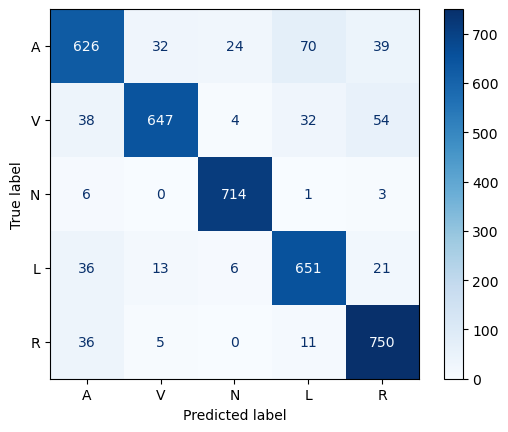

Classification Report For Linear SVM

              precision    recall  f1-score   support

           A       0.85      0.88      0.86       759
           V       0.89      0.91      0.90       760
           N       1.00      0.96      0.98       754
           L       0.90      0.92      0.91       713
           R       0.99      0.95      0.97       833

    accuracy                           0.92      3819
   macro avg       0.92      0.92      0.92      3819
weighted avg       0.93      0.92      0.92      3819



c:\Users\ci\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


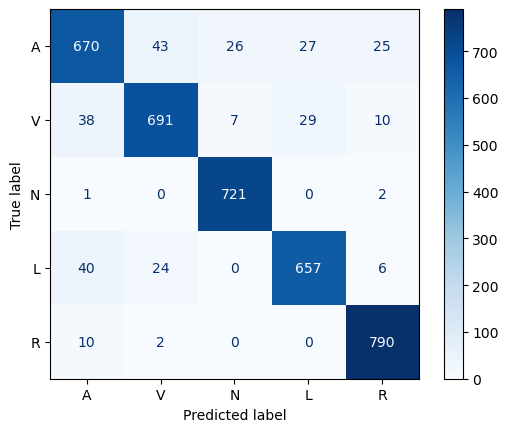

Classification Report For RBF SVM

              precision    recall  f1-score   support

           A       0.69      0.96      0.80       572
           V       0.94      0.60      0.73      1211
           N       0.89      0.98      0.93       657
           L       0.81      0.92      0.86       643
           R       0.85      0.92      0.88       736

    accuracy                           0.84      3819
   macro avg       0.84      0.88      0.84      3819
weighted avg       0.85      0.84      0.83      3819



c:\Users\ci\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


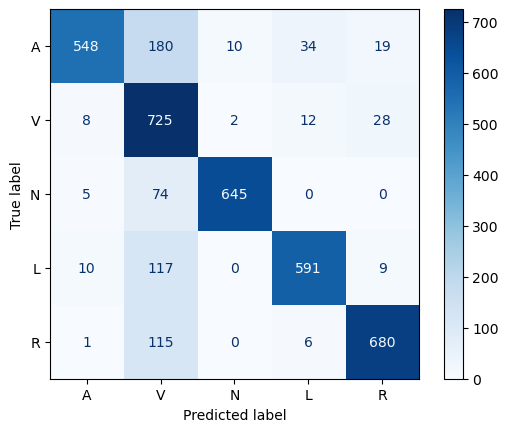

Classification Report For Neural Net

              precision    recall  f1-score   support

           A       0.90      0.95      0.92       749
           V       0.93      0.94      0.93       772
           N       0.99      0.97      0.98       743
           L       0.96      0.96      0.96       723
           R       1.00      0.96      0.98       832

    accuracy                           0.95      3819
   macro avg       0.96      0.96      0.96      3819
weighted avg       0.96      0.95      0.96      3819



c:\Users\ci\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


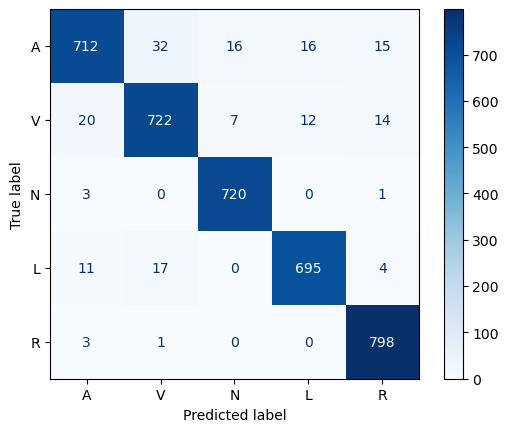

In [21]:
# Iterate over classifiers and show thier results
for clf_object in classifiers:
    # Train the model
    clf_object.clf.fit(X_train_pca, y_train)
    # Predict
    y_pred = clf_object.clf.predict(X_test_pca)
    # Calculate classification metrics
    clf_object.accuracy = np.round(metrics.accuracy_score(y_test, y_pred), 4)
    clf_object.precision = np.round(metrics.precision_score(y_test, y_pred, average='weighted'), 4)
    clf_object.recall = np.round(metrics.recall_score(y_test, y_pred, average='weighted'), 4)
    clf_object.f1 = np.round(metrics.f1_score(y_test, y_pred, average='weighted'), 4)
    # Print the classification report and plot the confusion matrix
    print(f'Classification Report For {clf_object.name}\n')
    print(metrics.classification_report(y_pred, y_test, target_names=classes))
    metrics.plot_confusion_matrix(clf_object.clf, X_test_pca, y_test, display_labels=classes, cmap=plt.cm.Blues)
    plt.show()

In [22]:
from IPython.display import HTML, display

rows = ""
for clf_object in classifiers:
    rows += f"""
    <tr>
        <td><b>{clf_object.name}</b></td>
        <td>{clf_object.accuracy}</td>
        <td>{clf_object.precision}</td>
        <td>{clf_object.recall}</td>
        <td>{clf_object.f1}</td>
    </tr>
    """

html = HTML(f"""
<table>
<thead>
    <th>Algorithm</th>
    <th>Accuracy</th>
    <th>Precision</th>
    <th>Recall</th>
    <th>F1 Score</th>
</thead>
<tbody>
{rows}
</tbody>
</table>
""")
display(html)

Nearest Neighbors,0.8871,0.8877,0.8871,0.8863
Linear SVM,0.9241,0.9232,0.9241,0.9234
RBF SVM,0.835,0.875,0.835,0.8417
Neural Net,0.955,0.9548,0.955,0.9546
